In [7]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,recall_score ,f1_score
from sklearn.metrics import classification_report 

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')



In [8]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## *Explore data

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data.duplicated().sum()

0

### Analysis

In [13]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

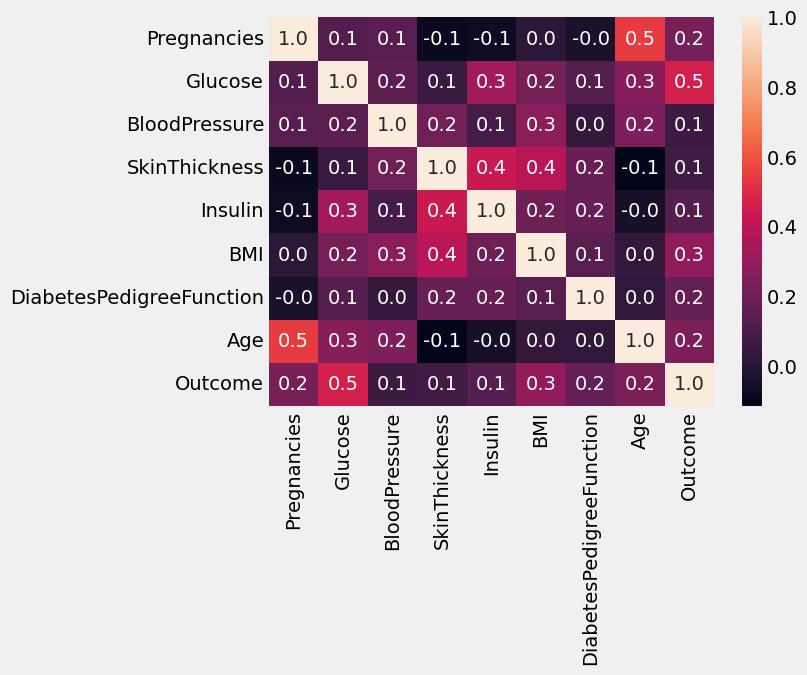

In [14]:
sns.heatmap(data.corr(),annot=True,fmt=('0.1f'))


<Axes: xlabel='Outcome', ylabel='count'>

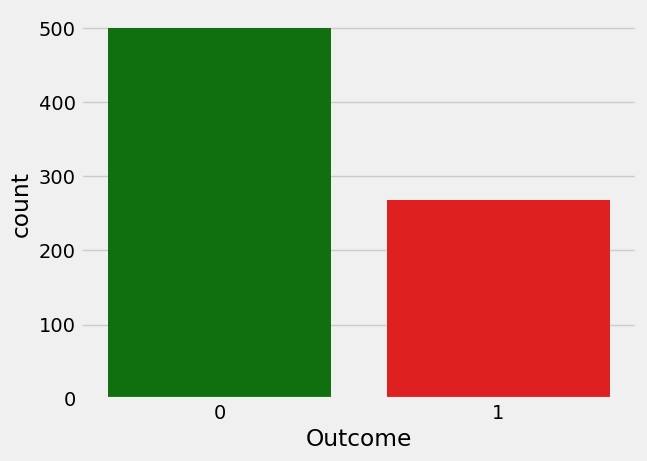

In [15]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

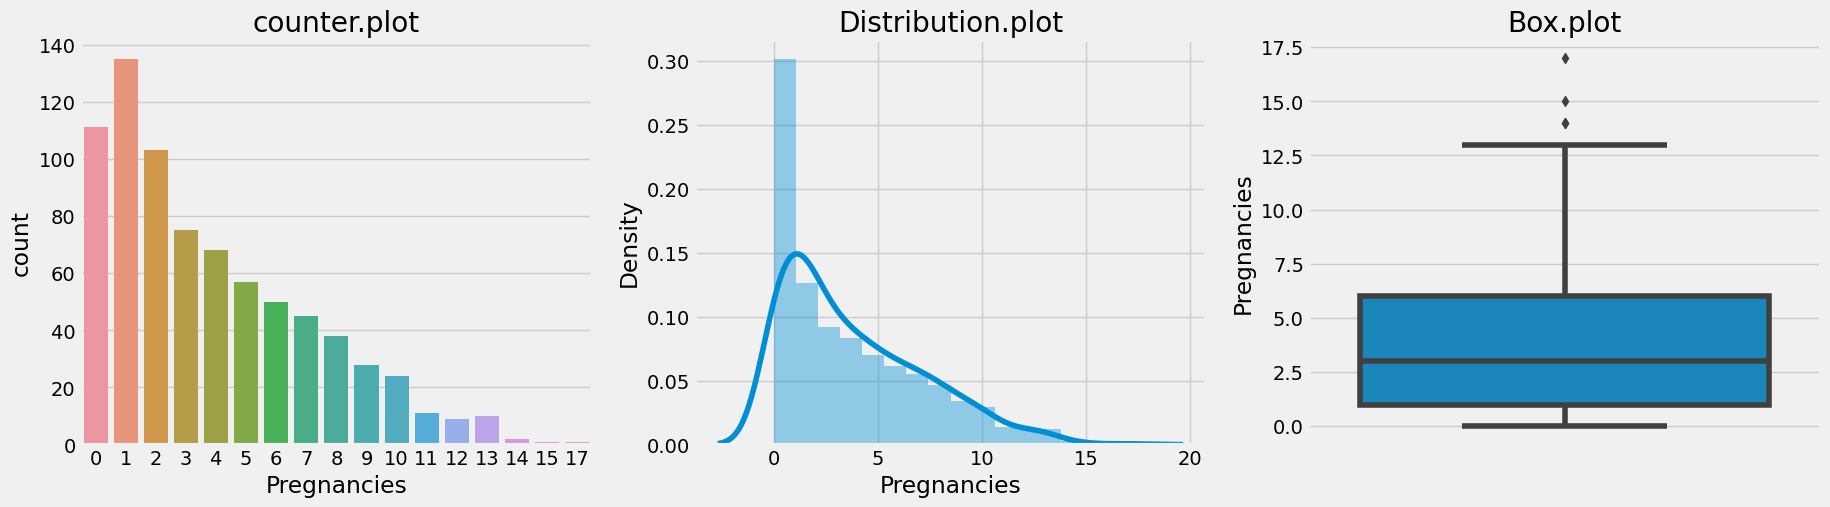

In [16]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title('counter.plot')
sns.countplot(x='Pregnancies',data=data)

#-----
plt.subplot(1,3,2)
plt.title('Distribution.plot')
sns.distplot(data['Pregnancies'])

plt.subplot(1,3,3)
plt.title('Box.plot')
sns.boxplot(y=data['Pregnancies']) 

plt.show()

<Axes: >

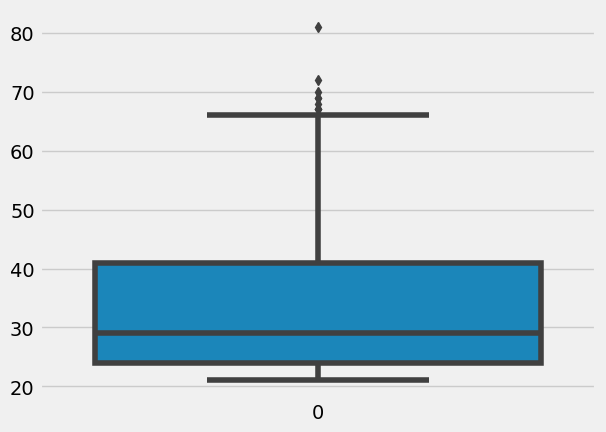

In [17]:
sns.boxplot(data.Age)

## create model

In [18]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)


In [20]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [21]:
model2=SVC()
model3=RandomForestClassifier()
model4=GradientBoostingClassifier(n_estimators=1000)


In [27]:
colums=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]





LogisticRegression()
accuracy is:  0.8181818181818182 recallis :  0.7317073170731707 f1 is:  0.6818181818181819


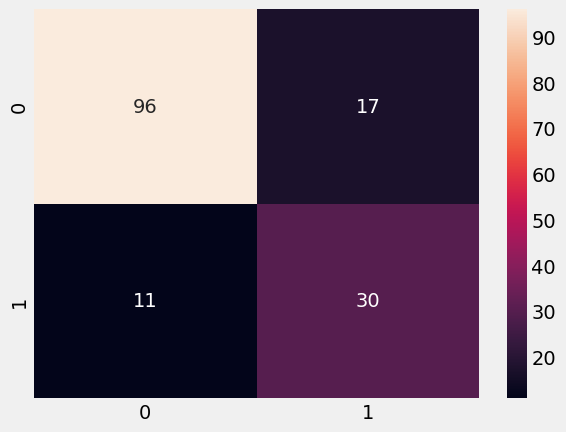

In [30]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    
    
    
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model1)
    print('accuracy is: ',accuracy,'recallis : ' ,recall, 'f1 is: ',f1)
    
cal(model1)    

In [24]:
accuracy_score(pre,y_test)
recall_score(pre,y_test)
f1_score(pre,y_test)
confusion_matrix(pre,y_test)



array([[96, 17],
       [11, 30]], dtype=int64)

In [26]:
print(model1)

LogisticRegression()


LogisticRegression()
accuracy is:  0.7922077922077922 recallis :  0.7272727272727273 f1 is:  0.5999999999999999


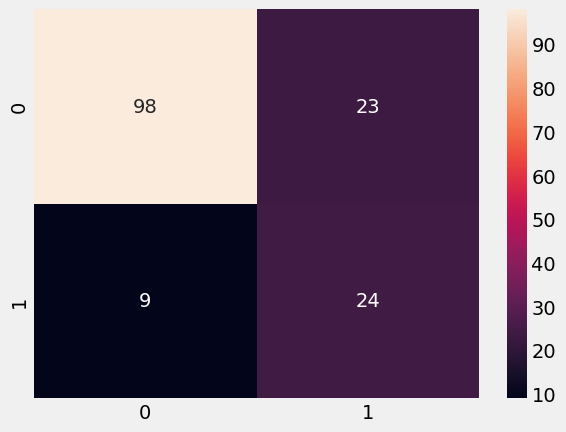

In [31]:
cal(model2)

LogisticRegression()
accuracy is:  0.8051948051948052 recallis :  0.7073170731707317 f1 is:  0.6590909090909092


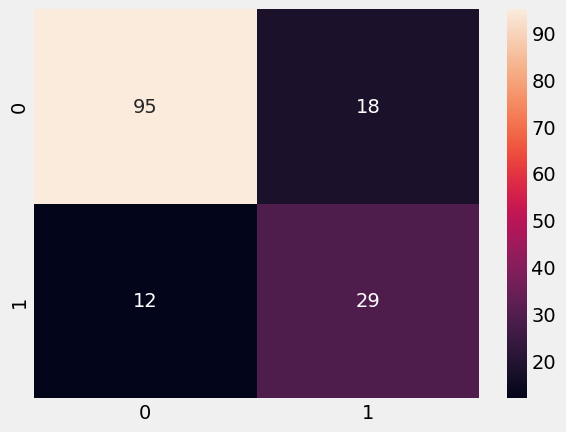

In [32]:
cal(model3)

LogisticRegression()
accuracy is:  0.7922077922077922 recallis :  0.6744186046511628 f1 is:  0.6444444444444444


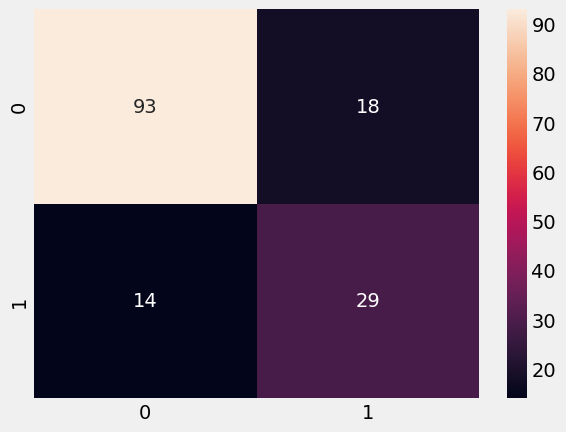

In [33]:
cal(model4)

In [34]:
result1

[0.8181818181818182,
 0.8181818181818182,
 0.7922077922077922,
 0.8051948051948052,
 0.7922077922077922]

In [35]:
result2

[0.7317073170731707,
 0.7317073170731707,
 0.7272727272727273,
 0.7073170731707317,
 0.6744186046511628]

In [36]:
result3

[0.6818181818181819,
 0.6818181818181819,
 0.5999999999999999,
 0.6590909090909092,
 0.6444444444444444]

In [38]:
print(len(colums))
print(len(result1))
print(len(result2))
print(len(result3))


4
5
5
5


In [39]:
max_length = max(len(colums), len(result1), len(result2), len(result3))

colums += [None] * (max_length - len(colums))
result1 += [None] * (max_length - len(result1))

result2 += [None] * (max_length - len(result2))
result3 += [None] * (max_length - len(result3))


In [40]:
print(len(colums))
print(len(result1))
print(len(result2))
print(len(result3))


5
5
5
5


In [48]:
df=pd.DataFrame({'ALG':colums,'Accuracies':result1,'Recall':result2,'FScore':result3})
df

,ALG,Accuracies,Recall,FScore
0,LogisticRegression,0.818182,0.731707,0.681818
1,SVC,0.818182,0.731707,0.681818
2,RandomForestClassifier,0.792208,0.727273,0.600000
3,GradientBoostingClassifier,0.805195,0.707317,0.659091
4,None,0.792208,0.674419,0.644444


In [71]:
''''fig,ax=plt.subplots(figsize=(20,5))
plt.plot(df.ALG,result1)
plt.plot(df.ALG,result2)
plt.plot(df.ALG,result3)'''

"'fig,ax=plt.subplots(figsize=(20,5))\nplt.plot(df.ALG,result1)\nplt.plot(df.ALG,result2)\nplt.plot(df.ALG,result3)"

In [58]:
print(len(df.ALG))
print(len(result1))


4
5


In [59]:
min_length = min(len(df.ALG), len(result1))
df = df.iloc[:min_length]
result1 = result1[:min_length]


In [63]:
print(len(df.ALG))
print(len(result2))
print(len(df.ALG))
print(len(result3))


4
5
4
5


In [55]:
df = df.dropna(subset=['ALG'])


In [50]:
df['ALG'] = df['ALG'].fillna('Unknown')


In [51]:
print(df['ALG'])


0            LogisticRegression
1                           SVC
2        RandomForestClassifier
3    GradientBoostingClassifier
Name: ALG, dtype: object


4
4
4
4
4
4
4
4


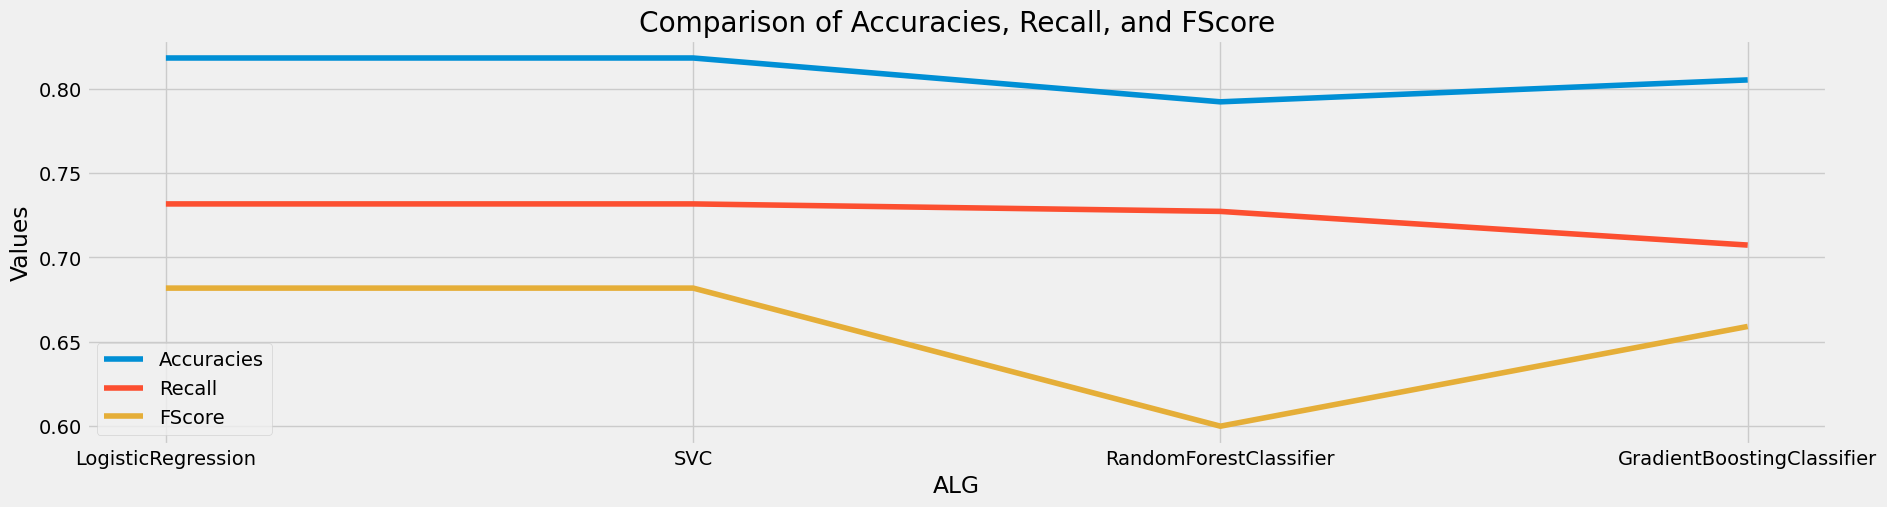

In [72]:
import matplotlib.pyplot as plt

# التأكد من أطوال القوائم
print(len(df.ALG))
print(len(result1))
print(len(result2))
print(len(result3))

# تحديد الطول الأصغر
min_length = min(len(df.ALG), len(result1), len(result2), len(result3))

# تقليل الأطوال لتكون متساوية
df = df.iloc[:min_length]
result1 = result1[:min_length]
result2 = result2[:min_length]
result3 = result3[:min_length]

# التأكد من الأطوال بعد التعديل
print(len(df.ALG))
print(len(result1))
print(len(result2))
print(len(result3))

# رسم البيانات
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(df.ALG, result1, label='Accuracies')
plt.plot(df.ALG, result2, label='Recall')
plt.plot(df.ALG, result3, label='FScore')

# إضافة عناوين وتوضيحات
plt.xlabel('ALG')
plt.ylabel('Values')
plt.title('Comparison of Accuracies, Recall, and FScore')
plt.legend()

plt.show()


الحمد الله  
وَقُلْ رَبِّ زِدْنِي عِلْمً